In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
players = pd.read_csv("C:/Users/Martin Padilla/kaggle/players.csv")
teams = pd.read_csv("C:/Users/Martin Padilla/kaggle/teams.csv")
games = pd.read_csv("C:/Users/Martin Padilla/kaggle/games.csv")
details = pd.read_csv("C:/Users/Martin Padilla/kaggle/games_details.csv")
ranking = pd.read_csv("C:/Users/Martin Padilla/kaggle/ranking.csv")

C:\Users\Martin Padilla\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
details = details.drop_duplicates(subset=["GAME_ID", "PLAYER_NAME"])
details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [56]:
bron = details[details["PLAYER_NAME"] == "LeBron James"]
bron.drop(["TEAM_ID", "TEAM_CITY", "PLAYER_ID", "PLAYER_NAME", "COMMENT"], axis=1, inplace=True)
bron.head()

C:\Users\Martin Padilla\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GAME_ID,TEAM_ABBREVIATION,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
3156,22100107,LAL,LeBron,F,36:16,13.0,21.0,0.619,2.0,4.0,...,0.0,4.0,4.0,10.0,2.0,0.0,4.0,3.0,30.0,8.0
3531,22100093,LAL,LeBron,F,34:32,6.0,19.0,0.316,0.0,6.0,...,1.0,6.0,7.0,8.0,4.0,1.0,2.0,0.0,15.0,7.0
4008,22100077,LAL,LeBron,F,37:57,10.0,22.0,0.455,1.0,10.0,...,1.0,2.0,3.0,8.0,3.0,1.0,7.0,1.0,26.0,9.0
4354,22100061,LAL,LeBron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4545,22100053,LAL,LeBron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
games_date = games[["GAME_DATE_EST", "GAME_ID", "SEASON"]]
games_date.head()

,GAME_DATE_EST,GAME_ID,SEASON
0,2021-11-17,22100213,2021
1,2021-11-17,22100214,2021
2,2021-11-17,22100215,2021
3,2021-11-17,22100216,2021
4,2021-11-17,22100217,2021


In [87]:
stats = bron.merge(games_date, on="GAME_ID", how="left")

In [90]:
seasonal_stats = stats.groupby("SEASON").sum()/stats.groupby("SEASON").count()

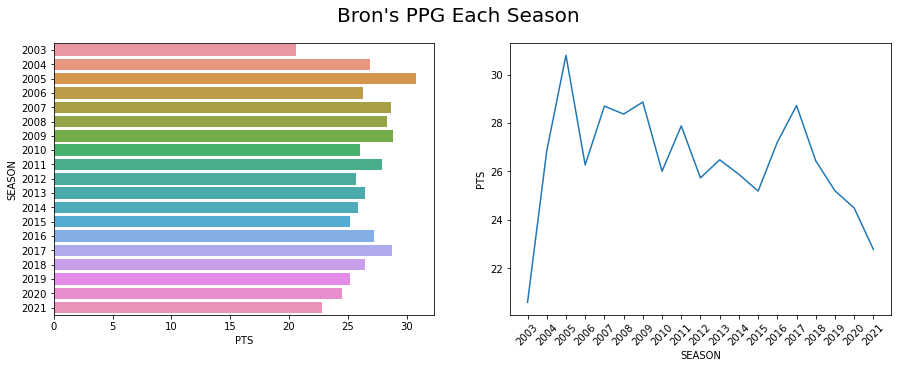

In [120]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's PPG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["PTS"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["PTS"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

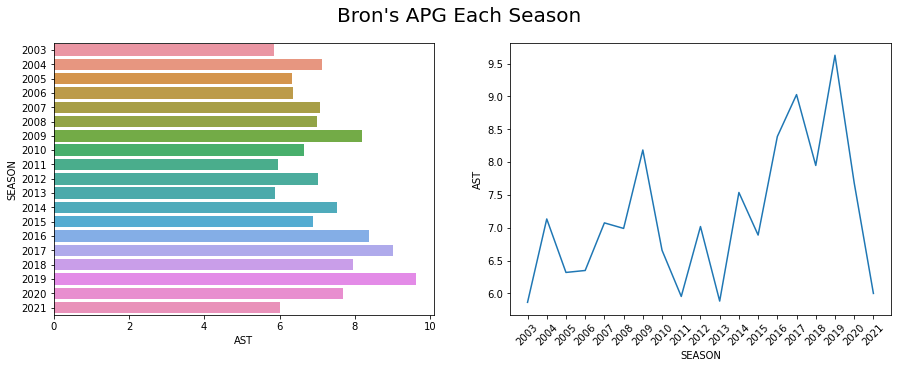

In [61]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's APG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["AST"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["AST"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

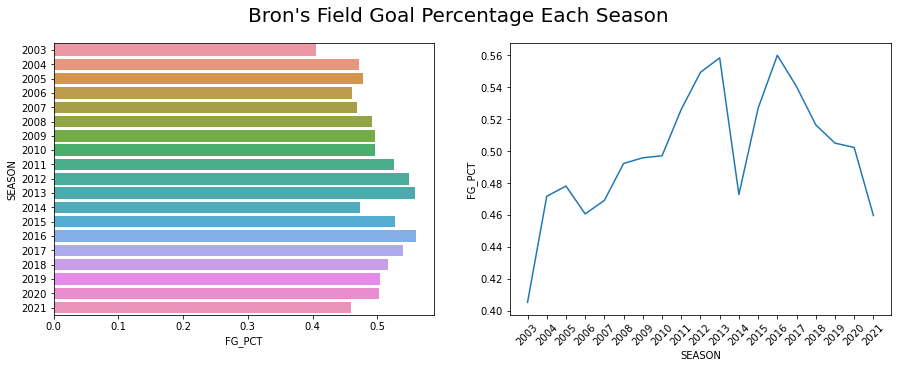

In [62]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's Field Goal Percentage Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["FG_PCT"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["FG_PCT"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

In [63]:
all_players = details[["PLAYER_NAME", "PTS", "AST", "REB", "BLK", "STL", "PF", "MIN", "FGM", "FGA", "FG3M", "FG3A", "FTM", "FTA"]]
all_players = all_players.groupby("PLAYER_NAME").sum()
all_players

,PTS,AST,REB,BLK,STL,PF,FGM,FGA,FG3M,FG3A,FTM,FTA
PLAYER_NAME,,,,,,,,,,,,
A.J. Guyton,4.0,1.0,2.0,0.0,1.0,2.0,0.0,4.0,0.0,2.0,4.0,4.0
A.J. Lawson,8.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0
AJ Hammons,82.0,7.0,60.0,16.0,1.0,34.0,34.0,76.0,5.0,12.0,9.0,20.0
AJ Price,1832.0,647.0,435.0,9.0,143.0,289.0,655.0,1686.0,267.0,805.0,255.0,343.0
Aamir Simms,4.0,2.0,5.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Zion Williamson,2337.0,289.0,637.0,49.0,80.0,191.0,899.0,1481.0,17.0,55.0,522.0,761.0
Zoran Dragic,28.0,5.0,9.0,0.0,2.0,6.0,11.0,33.0,3.0,15.0,3.0,5.0
Zoran Planinic,651.0,189.0,223.0,7.0,68.0,264.0,225.0,553.0,40.0,144.0,161.0,240.0


C:\Users\Martin Padilla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Martin Padilla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Martin Padilla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

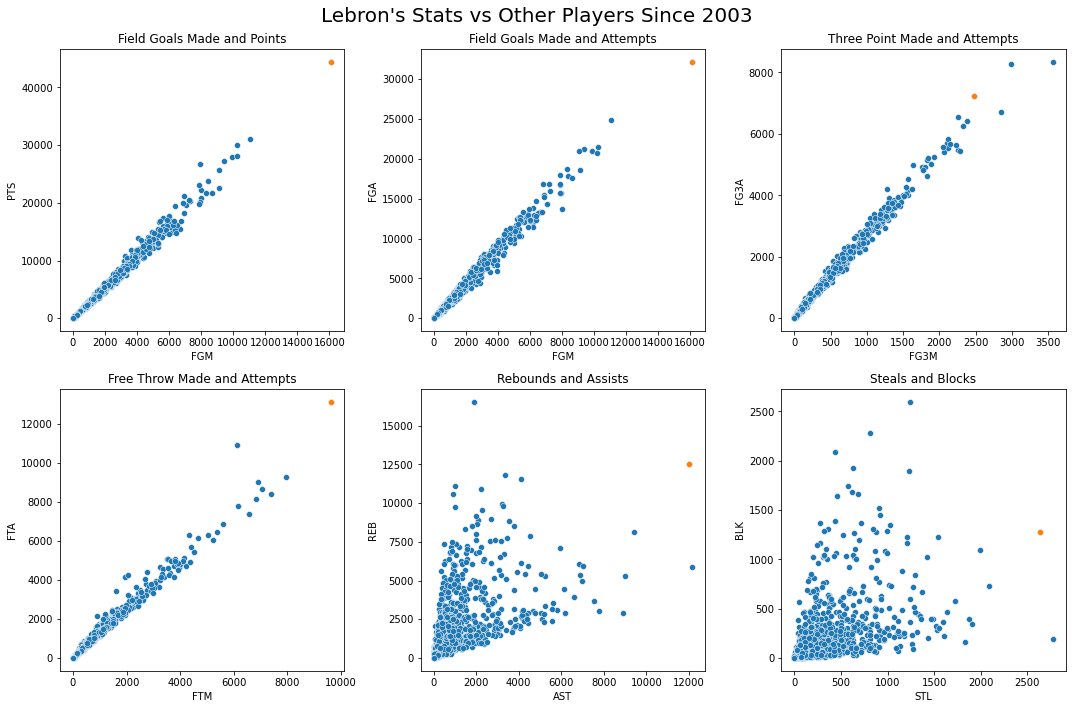

In [64]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
fig.suptitle("Lebron's Stats vs Other Players Since 2003", fontsize=20)

sns.scatterplot(all_players["FGM"], all_players["PTS"], ax = axes[0][0])
sns.scatterplot(x="FGM", y="PTS", data=all_players[all_players.index == "LeBron James"], ax = axes[0][0])
axes[0][0].title.set_text('Field Goals Made and Points')

sns.scatterplot(all_players["FGM"], all_players["FGA"], ax = axes[0][1])
sns.scatterplot(x="FGM", y="FGA", data=all_players[all_players.index == "LeBron James"], ax = axes[0][1])
axes[0][1].title.set_text('Field Goals Made and Attempts')

sns.scatterplot(all_players["FG3M"], all_players["FG3A"], ax = axes[0][2])
sns.scatterplot(x="FG3M", y="FG3A", data=all_players[all_players.index == "LeBron James"], ax = axes[0][2])
axes[0][2].title.set_text('Three Point Made and Attempts')

sns.scatterplot(all_players["FTM"], all_players["FTA"], ax = axes[1][0])
sns.scatterplot(x="FTM", y="FTA", data=all_players[all_players.index == "LeBron James"], ax = axes[1][0])
axes[1][0].title.set_text('Free Throw Made and Attempts')

sns.scatterplot(all_players["AST"], all_players["REB"], ax = axes[1][1])
sns.scatterplot(x="AST", y="REB", data=all_players[all_players.index == "LeBron James"], ax = axes[1][1] )
axes[1][1].title.set_text('Rebounds and Assists')

sns.scatterplot(all_players["STL"], all_players["BLK"], ax = axes[1][2])
sns.scatterplot(x="STL", y="BLK", data=all_players[all_players.index == "LeBron James"], ax = axes[1][2])
axes[1][2].title.set_text('Steals and Blocks')

fig.tight_layout()